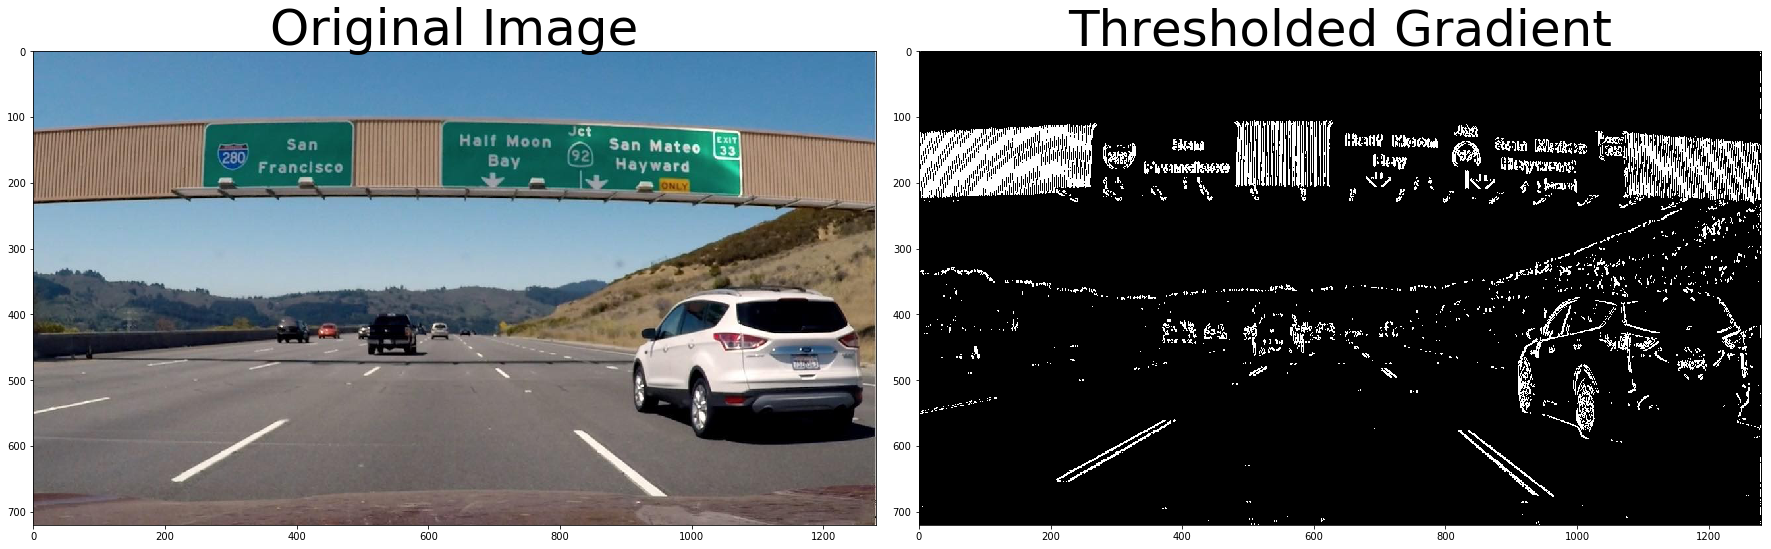

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# Read in an image and grayscale it
image = mpimg.imread('calibration_wide/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient=='x':
        sobeld = cv2.Sobel(gray,cv2.CV_64F,1,0)
    else:
        sobeld = cv2.Sobel(gray,cv2.CV_64F,0,1)
        
        
    # 3) Take the absolute value of the derivative or gradient
    absval = np.absolute(sobeld) 
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    skaled = np.zeros(absval.shape)
    #skaled = np.uint8(255*absval/np.max(absval))

    skaled = cv2.normalize(absval,skaled, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    skaled[skaled<=thresh_min] = 0
    skaled[skaled>=thresh_max]  = 0
    skaled[skaled!=0]  = 1
    # 6) Return this mask as your binary_output image
    binary_output = skaled
    
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()